In [ ]:
# the original assignment this code is based on is Assign 6
# https://www.kaggle.com/datasets/uciml/zoo-animal-classification?select=zoo.csv

# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Import data from file into a DataFrame
df = pd.read_csv("zoo.csv")

In [ ]:
# Define the feature and target values
from sklearn.datasets import make_classification

X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values
Z = df.iloc[:,1:-2].values
for i in range(len(Z)):
  Z[i][0] = i
Z[90]

array([90,  0,  1,  0,  0,  0,  0,  0,  1,  1,  0,  0,  4,  1,  0])

In [ ]:
# FEATURE SCALING
from sklearn.preprocessing import StandardScaler

# create instances of StandardScaler
sc = StandardScaler()

# transform X using fit_transform method of sc
X = sc.fit_transform(X)


In [ ]:
# Split X, y into X_train, X_test, y_train, y_test with 7.5:2.5 ratio
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)
Z_train, Z_test, a_train, a_test = train_test_split(Z, y, test_size = 0.25, random_state=0)

X_test_original = sc.inverse_transform(X_test)
print(X_test_original)


[[0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 4. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 4. 1. 0. 1.]
 [1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 2. 1. 0. 1.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 4. 1. 0. 0.]
 [0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 4. 1. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 2. 1. 0. 1.]
 [0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 8. 0. 0. 1.]
 [1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 2. 1. 0. 0.]
 [0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 6. 0. 0. 0.]
 [1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 4. 1. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 6. 0. 0. 0.]
 [0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.]
 [0. 0. 1. 0. 0. 1. 1. 1. 1. 0.

In [ ]:
# Build a SVM model with RBF kernel on the Training Set
from sklearn.svm import SVC

clf = SVC(random_state=0)
# fit
clf.fit(X_train,y_train)

SVC(random_state=0)

In [ ]:
# Predict the test set results y_pred (y_hat) from X_test 

y_pred = clf.predict(X_test)
y_pred

array([7, 3, 4, 1, 1, 1, 2, 4, 1, 1, 7, 1, 2, 7, 4, 6, 1, 6, 2, 4, 2, 3,
       1, 2, 1, 1])

In [ ]:
# Compute Confussion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

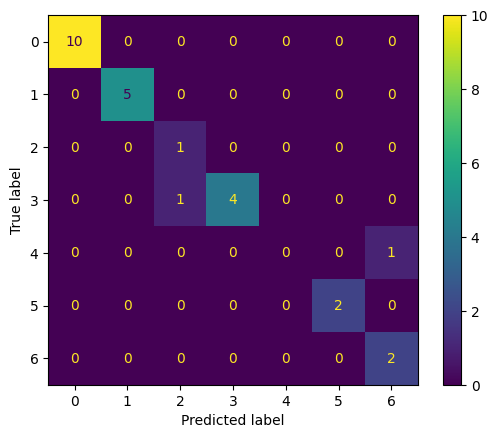

In [ ]:
# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Import metrics from sklearn
from sklearn import metrics

# Accuracy Score
acc = metrics.accuracy_score(y_test, y_pred)
print('Accuracy = ', str(acc))
# Precision Score
#assuming that the classifier correctly predicted all samples for that class
pre = metrics.precision_score(y_test, y_pred, average='weighted', zero_division=1)
print('Precision = ', str(pre))
# Recall Score
red = metrics.recall_score(y_test, y_pred, average='weighted')
print('Recall = ', str(red))
# F1 Score
f1 = metrics.f1_score(y_test, y_pred, average='weighted')
print('F1_Score = ', str(f1))

Accuracy =  0.9230769230769231
Precision =  0.9551282051282051
Recall =  0.9230769230769231
F1_Score =  0.9119658119658121
